In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn 
from datetime import datetime
sns.set(rc = {'figure.figsize':(12,6)})

In [2]:
df= pd.read_csv('final_ds.csv')

In [3]:
df.dropna(axis=0, inplace=True)

In [4]:
#sns.pairplot(data=df_st.drop('TimeOMS',axis=1), hue='HourofDay')
def dt(dtstring): 
    x=datetime.strptime(dtstring, '%Y-%m-%d %H:%M:%S')
    return x
df.dtypes
df['TimeOMS']=df['TimeOMS'].apply(lambda stringdate: dt(stringdate))
df['TS']= df['TimeOMS'].apply(lambda x: x.timestamp())

In [5]:
df.head()

,TimeOMS,ValueOMS,ValueOOS,ValueRT,ValueST,ValueOAT,AnomalousST,STDeviation,AnomalousOAT,OATDeviation,ValueOAH,HourofDay,Month,Year,DayofWeek,Season,TS
0,2017-12-08 16:00:52,2.0,1.0,24.5,26.0,15.1,1.0,-1.5,0.0,9.4,62.895,16.0,12.0,2017.0,4.0,4,1.512749e+09
1,2017-12-08 16:10:52,2.0,1.0,24.5,26.0,15.6,1.0,-1.5,0.0,8.9,62.895,16.0,12.0,2017.0,4.0,4,1.512749e+09
2,2017-12-11 10:40:52,2.0,1.0,20.0,25.0,14.6,1.0,-5.0,0.0,5.4,55.420,10.0,12.0,2017.0,0.0,4,1.512989e+09
3,2017-12-11 10:50:52,2.0,1.0,20.5,25.0,14.6,1.0,-4.5,0.0,5.9,56.460,10.0,12.0,2017.0,0.0,4,1.512989e+09
4,2017-12-11 11:00:52,2.0,1.0,21.0,25.0,14.6,1.0,-4.0,0.0,6.4,56.460,11.0,12.0,2017.0,0.0,4,1.512990e+09


In [6]:
df1=df.drop(['TimeOMS','ValueOOS','AnomalousST','AnomalousOAT', 'Month', 'Year','DayofWeek'],axis=1)

In [7]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn import metrics 
from sklearn.metrics import davies_bouldin_score


# DBSCAN

### Finding optimum epsilon

In [8]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

In [9]:
X_d=df1
#.drop(['TimeOMS','Month', 'DayofWeek','AnomalousST','AnomalousOAT','ValueOOS', 'Year','Season'],axis=1)
scaler1= StandardScaler()
scaler1=scaler1.fit(X_d)
X_db=scaler1.transform(X_d)

In [10]:
X_d.head()

,ValueOMS,ValueRT,ValueST,ValueOAT,STDeviation,OATDeviation,ValueOAH,HourofDay,Season,TS
0,2.0,24.5,26.0,15.1,-1.5,9.4,62.895,16.0,4,1.512749e+09
1,2.0,24.5,26.0,15.6,-1.5,8.9,62.895,16.0,4,1.512749e+09
2,2.0,20.0,25.0,14.6,-5.0,5.4,55.420,10.0,4,1.512989e+09
3,2.0,20.5,25.0,14.6,-4.5,5.9,56.460,10.0,4,1.512989e+09
4,2.0,21.0,25.0,14.6,-4.0,6.4,56.460,11.0,4,1.512990e+09


In [11]:
X_db

array([[ 0.9045017 , -0.66065818,  0.11533939, ...,  0.36097952,
         1.05412883, -2.53077938],
       [ 0.9045017 , -0.66065818,  0.11533939, ...,  0.36097952,
         1.05412883, -2.53074308],
       [ 0.9045017 , -3.15947302, -0.26147226, ..., -1.05291601,
         1.05412883, -2.51626061],
       ...,
       [ 0.9045017 , -0.10536599,  0.30374522, ...,  1.5392258 ,
         1.05412883,  1.67266692],
       [ 0.9045017 , -0.38301208,  0.30374522, ...,  1.5392258 ,
         1.05412883,  1.67270322],
       [ 0.9045017 , -0.10536599,  0.30374522, ...,  1.5392258 ,
         1.05412883,  1.67273952]])

In [12]:
neighbors= NearestNeighbors(n_neighbors=20, algorithm='kd_tree')
neighbors_fit= neighbors.fit(X_db)
distances, indices =neighbors_fit.kneighbors(X_db)


Text(0.5, 1.0, 'K Distance Graph for DBSCAN')

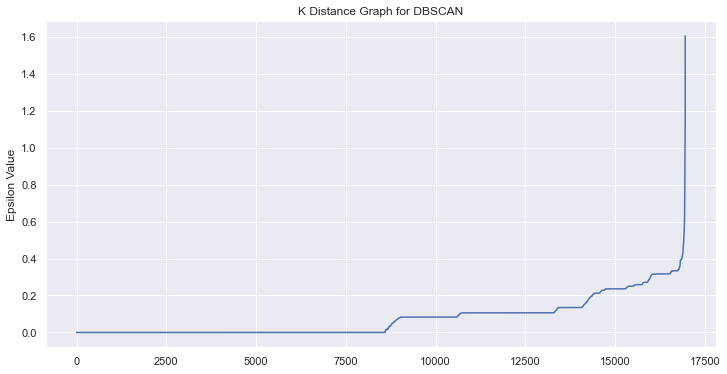

In [13]:
distances=np.sort(distances, axis=0)
distances=distances[:,1]
plt.plot(distances) 
plt.ylabel('Epsilon Value')
plt.title('K Distance Graph for DBSCAN')

In [15]:
from sklearn.cluster import DBSCAN
db= DBSCAN(eps=0.5, min_samples=20).fit(X_db)
#print(db.value_counts())
unique, counts = np.unique(db, return_counts=True)
dict(zip(unique, counts))
labels = db.labels_
#fts=db.feature_names_in_
#print(n_features_in_)


In [16]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_db, labels))
print(metrics.silhouette_score(X_db,labels))
print('calinski harabasz score')
print(metrics.calinski_harabasz_score(X_db, labels))
print('davies bouldin')
print(davies_bouldin_score(X_db, labels))
# #############################################################################
# Plot result


Estimated number of clusters: 44
Estimated number of noise points: 5017
Silhouette Coefficient: -0.190
-0.1902758065567206
calinski harabasz score
475.33230012270826
davies bouldin
1.4122053454731918


In [17]:
print(labels)

[ 0  0 -1 ... -1 -1 -1]


In [18]:
print(X_db)

[[ 0.9045017  -0.66065818  0.11533939 ...  0.36097952  1.05412883
  -2.53077938]
 [ 0.9045017  -0.66065818  0.11533939 ...  0.36097952  1.05412883
  -2.53074308]
 [ 0.9045017  -3.15947302 -0.26147226 ... -1.05291601  1.05412883
  -2.51626061]
 ...
 [ 0.9045017  -0.10536599  0.30374522 ...  1.5392258   1.05412883
   1.67266692]
 [ 0.9045017  -0.38301208  0.30374522 ...  1.5392258   1.05412883
   1.67270322]
 [ 0.9045017  -0.10536599  0.30374522 ...  1.5392258   1.05412883
   1.67273952]]


In [19]:
df['DBScanCluster']= labels

In [20]:
df_dbnoise=df[df['DBScanCluster']==-1]
#df_dbnoise.to_csv('dbscan_noise.csv')
#df_dbnoise.head()

In [21]:
df_dbnormal=df[df['DBScanCluster']!=-1]
#df_dbnormal.to_csv('dbscan_normal.csv')

In [22]:
df_dbnoise.describe()

,ValueOMS,ValueOOS,ValueRT,ValueST,ValueOAT,AnomalousST,STDeviation,AnomalousOAT,OATDeviation,ValueOAH,HourofDay,Month,Year,DayofWeek,Season,TS,DBScanCluster
count,5017.000000,5017.0,5017.000000,5017.000000,5017.000000,5017.000000,5017.000000,5017.000000,5017.000000,5017.000000,5017.000000,5017.000000,5017.000000,5017.000000,5017.000000,5.017000e+03,5017.0
mean,1.489934,1.0,25.106438,25.445984,20.328244,0.735898,-0.339546,0.150090,4.778194,60.308617,14.230417,6.606338,2018.608730,2.120590,2.708391,1.549973e+09,-1.0
std,0.499948,0.0,2.310552,2.530116,8.622051,0.440898,4.032522,0.357195,7.318515,10.397317,4.607645,3.689275,0.674338,1.639697,1.128185,1.799882e+07,0.0
min,1.000000,1.0,15.000000,19.000000,2.500000,0.000000,-12.000000,0.000000,-9.400000,38.130000,0.000000,1.000000,2017.000000,0.000000,1.000000,1.512989e+09,-1.0
25%,1.000000,1.0,24.000000,24.000000,13.000000,0.000000,-3.000000,0.000000,-1.800000,52.105000,11.000000,3.000000,2018.000000,1.000000,2.000000,1.535893e+09,-1.0
50%,1.000000,1.0,25.500000,26.000000,19.700000,1.000000,-0.500000,0.000000,5.100000,59.190000,14.000000,7.000000,2019.000000,2.000000,3.000000,1.546937e+09,-1.0
75%,2.000000,1.0,26.500000,28.000000,28.100000,1.000000,2.500000,0.000000,10.600000,67.315000,18.000000,10.000000,2019.000000,3.000000,4.000000,1.562851e+09,-1.0
max,2.000000,1.0,32.000000,28.000000,35.700000,1.000000,12.500000,1.000000,21.200000,86.555000,23.000000,12.000000,2020.000000,6.000000,4.000000,1.582234e+09,-1.0


In [23]:
df_dblof=df_dbnoise.drop(['TimeOMS','ValueOOS','AnomalousST','AnomalousOAT','Month', 'Year','DayofWeek','DBScanCluster'],axis=1)

In [24]:
df_dblof.head()

,ValueOMS,ValueRT,ValueST,ValueOAT,STDeviation,OATDeviation,ValueOAH,HourofDay,Season,TS
2,2.0,20.0,25.0,14.6,-5.0,5.4,55.42,10.0,4,1.512989e+09
3,2.0,20.5,25.0,14.6,-4.5,5.9,56.46,10.0,4,1.512989e+09
4,2.0,21.0,25.0,14.6,-4.0,6.4,56.46,11.0,4,1.512990e+09
5,2.0,21.0,25.0,14.6,-4.0,6.4,55.42,11.0,4,1.512991e+09
6,2.0,21.5,25.0,15.1,-3.5,6.4,56.46,11.0,4,1.512991e+09


In [25]:
df_shap=df
def dbcluster(x):
    if x!=-1:
        x=0
    return x
df_shap['DBScanCluster']=df_shap['DBScanCluster'].apply(lambda x: dbcluster(x) )


In [26]:
df_shap=df_shap.drop(['TimeOMS','ValueOOS','AnomalousST','AnomalousOAT','Month', 'Year','DayofWeek'],axis=1)

In [27]:
df_shap

,ValueOMS,ValueRT,ValueST,ValueOAT,STDeviation,OATDeviation,ValueOAH,HourofDay,Season,TS,DBScanCluster
0,2.0,24.5,26.0,15.1,-1.5,9.4,62.895,16.0,4,1.512749e+09,0
1,2.0,24.5,26.0,15.6,-1.5,8.9,62.895,16.0,4,1.512749e+09,0
2,2.0,20.0,25.0,14.6,-5.0,5.4,55.420,10.0,4,1.512989e+09,-1
3,2.0,20.5,25.0,14.6,-4.5,5.9,56.460,10.0,4,1.512989e+09,-1
4,2.0,21.0,25.0,14.6,-4.0,6.4,56.460,11.0,4,1.512990e+09,-1
...,...,...,...,...,...,...,...,...,...,...,...
16953,2.0,25.5,26.5,13.6,-1.0,11.9,70.370,20.0,4,1.582232e+09,0
16954,2.0,25.5,26.5,13.1,-1.0,12.4,70.370,21.0,4,1.582233e+09,-1
16955,2.0,25.5,26.5,13.1,-1.0,12.4,69.330,21.0,4,1.582233e+09,-1
16956,2.0,25.0,26.5,13.1,-1.5,11.9,70.370,21.0,4,1.582234e+09,-1


In [22]:
df_shap['DBScanCluster'].value_counts()

 0    11937
-1     5017
Name: DBScanCluster, dtype: int64

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
#y=db.fit(X_db).labels_
y=df_shap['DBScanCluster']
#y=label_binarize(y, classes=[0,-1])
X_shap= df_shap.drop('DBScanCluster', axis=1)

rfc=RandomForestClassifier()
rfc.fit(X_db,y.ravel())

RandomForestClassifier()

Text(0.5, 1.0, 'Feature Importances Using Random Forest Classifier (DBSCAN)')

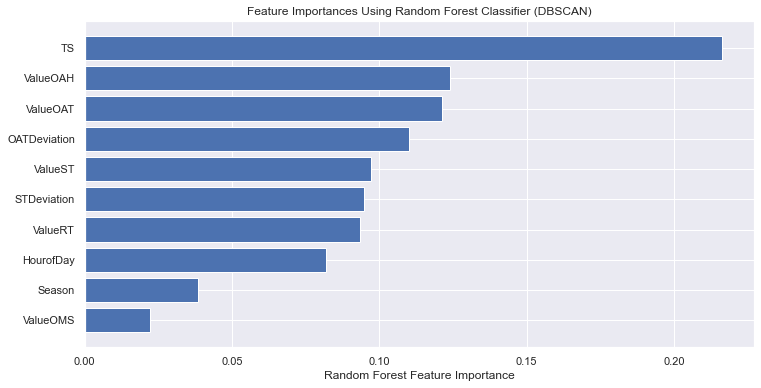

In [73]:
sorted_idx = rfc.feature_importances_.argsort()
plt.barh(X_shap.columns[sorted_idx], rfc.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title('Feature Importances Using Random Forest Classifier (DBSCAN)')
#plt.barh(X_shap.columns, rfc.feature_importances_)


In [29]:
import shap
explainer= shap.TreeExplainer(rfc)
shap_values = explainer(X_shap)

In [30]:
shap_values.shape

(16954, 10, 2)

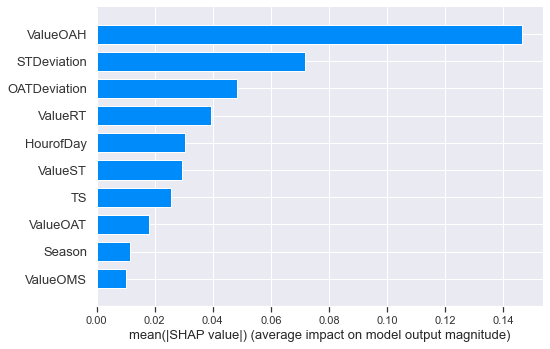

In [31]:
shap.summary_plot(shap_values.values[:,:,1], features=X_shap.columns, plot_type='bar')

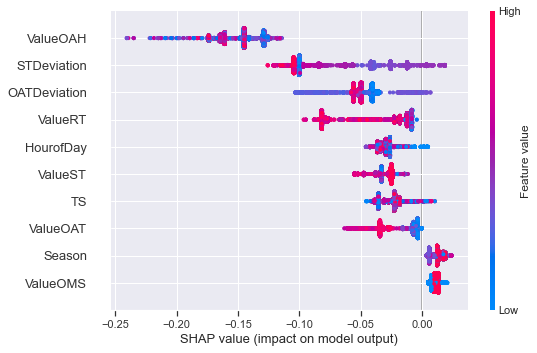

In [32]:
shap.plots.beeswarm(shap_values[:,:,1])

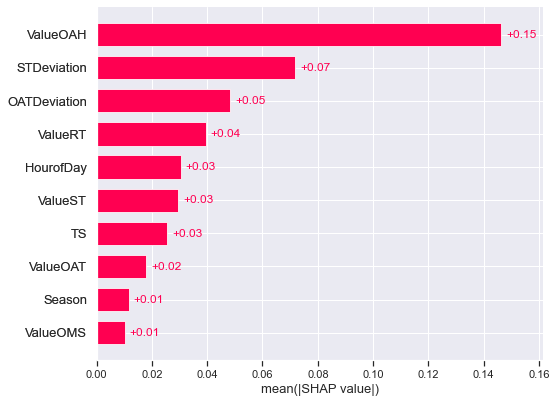

In [33]:
shap.plots.bar(shap_values[:,:,1])


### LOCAL Outlier Factor (DBSCAN Subset)

In [34]:
(df_dblof)

,ValueOMS,ValueRT,ValueST,ValueOAT,STDeviation,OATDeviation,ValueOAH,HourofDay,Season,TS
2,2.0,20.0,25.0,14.6,-5.0,5.4,55.42,10.0,4,1.512989e+09
3,2.0,20.5,25.0,14.6,-4.5,5.9,56.46,10.0,4,1.512989e+09
4,2.0,21.0,25.0,14.6,-4.0,6.4,56.46,11.0,4,1.512990e+09
5,2.0,21.0,25.0,14.6,-4.0,6.4,55.42,11.0,4,1.512991e+09
6,2.0,21.5,25.0,15.1,-3.5,6.4,56.46,11.0,4,1.512991e+09
...,...,...,...,...,...,...,...,...,...,...
16952,2.0,26.0,26.5,13.1,-0.5,12.9,71.41,20.0,4,1.582231e+09
16954,2.0,25.5,26.5,13.1,-1.0,12.4,70.37,21.0,4,1.582233e+09
16955,2.0,25.5,26.5,13.1,-1.0,12.4,69.33,21.0,4,1.582233e+09
16956,2.0,25.0,26.5,13.1,-1.5,11.9,70.37,21.0,4,1.582234e+09


In [35]:
#X_db_lof=
#.drop(['TimeOMS','Month', 'DayofWeek','AnomalousST','AnomalousOAT','ValueOOS', 'Year','Season'],axis=1)
scaler2= StandardScaler()
scaler2=scaler2.fit(df_dblof)
X_dblof=scaler1.transform(df_dblof)

In [36]:
X_dblof

array([[ 0.9045017 , -3.15947302, -0.26147226, ..., -1.05291601,
         1.05412883, -2.51626061],
       [ 0.9045017 , -2.88182693, -0.26147226, ..., -1.05291601,
         1.05412883, -2.51622431],
       [ 0.9045017 , -2.60418084, -0.26147226, ..., -0.81726676,
         1.05412883, -2.51618802],
       ...,
       [ 0.9045017 , -0.10536599,  0.30374522, ...,  1.5392258 ,
         1.05412883,  1.67266692],
       [ 0.9045017 , -0.38301208,  0.30374522, ...,  1.5392258 ,
         1.05412883,  1.67270322],
       [ 0.9045017 , -0.10536599,  0.30374522, ...,  1.5392258 ,
         1.05412883,  1.67273952]])

In [37]:
from sklearn.neighbors import LocalOutlierFactor 
# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20)
y_pred = clf.fit_predict(X_dblof)
X_scores = clf.negative_outlier_factor_
clfoffset=clf.offset_


In [38]:
print(X_scores)

[-1.11284579 -1.07292151 -1.03729746 ... -0.99584195 -1.09674545
 -1.01579427]


In [39]:
clfoffset

-1.5

In [40]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

(-1.54, 0.0)

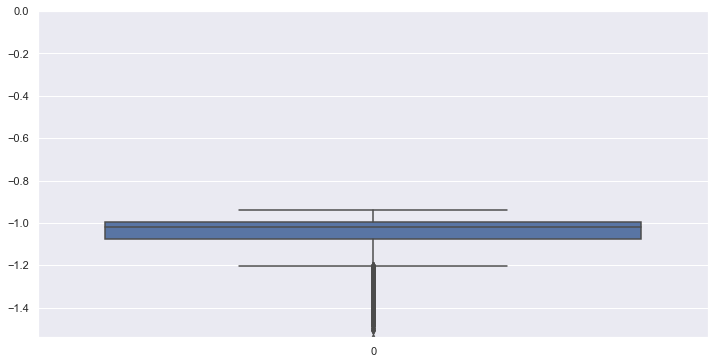

In [41]:
sns.boxplot(data=X_scores)
plt.ylim(-1.54,0)

<AxesSubplot:>

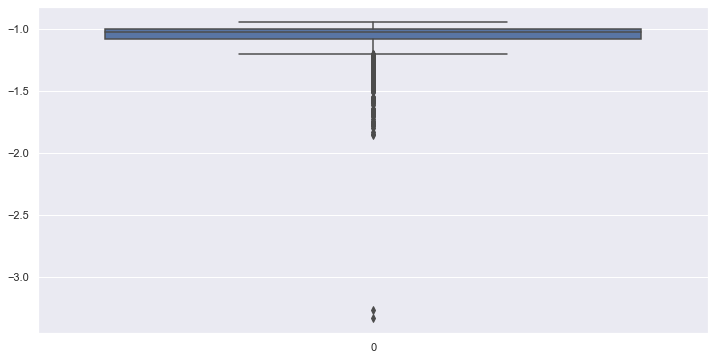

In [42]:
sns.boxplot(data=X_scores)
#plt.ylim(-1.7,0)

In [43]:
w=((X_scores)<=-1.2)
unique, counts = np.unique(w, return_counts=True)

np.asarray((unique, counts)).T

array([[   0, 4629],
       [   1,  388]], dtype=int64)

In [44]:
np.std(X_scores)

0.112651298496888

In [45]:
np.mean(X_scores)

-1.0554384801343744

In [46]:
df_dbnoise['LOF']=(X_scores)
df_dbnoise.head()



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,TimeOMS,ValueOMS,ValueOOS,ValueRT,ValueST,ValueOAT,AnomalousST,STDeviation,AnomalousOAT,OATDeviation,ValueOAH,HourofDay,Month,Year,DayofWeek,Season,TS,DBScanCluster,LOF
2,2017-12-11 10:40:52,2.0,1.0,20.0,25.0,14.6,1.0,-5.0,0.0,5.4,55.42,10.0,12.0,2017.0,0.0,4,1.512989e+09,-1,-1.112846
3,2017-12-11 10:50:52,2.0,1.0,20.5,25.0,14.6,1.0,-4.5,0.0,5.9,56.46,10.0,12.0,2017.0,0.0,4,1.512989e+09,-1,-1.072922
4,2017-12-11 11:00:52,2.0,1.0,21.0,25.0,14.6,1.0,-4.0,0.0,6.4,56.46,11.0,12.0,2017.0,0.0,4,1.512990e+09,-1,-1.037297
5,2017-12-11 11:10:52,2.0,1.0,21.0,25.0,14.6,1.0,-4.0,0.0,6.4,55.42,11.0,12.0,2017.0,0.0,4,1.512991e+09,-1,-1.044922
6,2017-12-11 11:20:52,2.0,1.0,21.5,25.0,15.1,1.0,-3.5,0.0,6.4,56.46,11.0,12.0,2017.0,0.0,4,1.512991e+09,-1,-1.038174


In [47]:
df_dblof_n=df_dbnoise[df_dbnoise['LOF']<=-1.2]
#df_dblof_n.to_csv('dblof_anomalies1.csv')
len(df_dblof_n)

388

In [48]:
(df_dblof_n).head()

,TimeOMS,ValueOMS,ValueOOS,ValueRT,ValueST,ValueOAT,AnomalousST,STDeviation,AnomalousOAT,OATDeviation,ValueOAH,HourofDay,Month,Year,DayofWeek,Season,TS,DBScanCluster,LOF
104,2017-12-20 12:10:52,2.0,1.0,19.5,27.0,11.4,1.0,-7.5,0.0,8.1,54.640,12.0,12.0,2017.0,2.0,4,1.513772e+09,-1,-1.253365
136,2018-01-15 09:40:52,2.0,1.0,18.5,26.0,9.9,1.0,-7.5,0.0,8.6,66.990,9.0,1.0,2018.0,0.0,4,1.516009e+09,-1,-1.284345
232,2018-01-18 17:10:52,2.0,1.0,26.5,26.0,11.6,0.0,0.5,0.0,14.9,42.355,17.0,1.0,2018.0,3.0,4,1.516295e+09,-1,-1.220959
237,2018-01-23 17:40:52,2.0,1.0,21.5,26.0,9.8,1.0,-4.5,0.0,11.7,66.340,17.0,1.0,2018.0,1.0,4,1.516729e+09,-1,-1.248768
239,2018-01-25 16:20:52,2.0,1.0,22.0,26.0,8.4,1.0,-4.0,0.0,13.6,50.805,16.0,1.0,2018.0,3.0,4,1.516897e+09,-1,-1.236529


In [32]:

(df_dblof_n).index.to_list()

[104,
 136,
 232,
 237,
 239,
 245,
 250,
 265,
 266,
 267,
 306,
 307,
 359,
 360,
 361,
 362,
 363,
 374,
 375,
 376,
 377,
 378,
 380,
 416,
 417,
 450,
 451,
 452,
 479,
 480,
 481,
 482,
 483,
 484,
 485,
 486,
 487,
 521,
 522,
 523,
 524,
 726,
 727,
 728,
 729,
 730,
 731,
 732,
 785,
 887,
 891,
 892,
 893,
 894,
 895,
 896,
 897,
 924,
 926,
 927,
 1124,
 1125,
 1128,
 1129,
 1130,
 1131,
 1132,
 1133,
 1134,
 1135,
 1156,
 1230,
 1296,
 1587,
 1605,
 1708,
 1709,
 2015,
 2016,
 2056,
 2057,
 2058,
 2059,
 2060,
 2062,
 2063,
 2124,
 2159,
 2160,
 2161,
 2282,
 2283,
 2284,
 2313,
 2387,
 2388,
 2389,
 2390,
 2391,
 2437,
 2454,
 2517,
 2518,
 2519,
 2816,
 2817,
 2818,
 2819,
 2820,
 2821,
 2875,
 2876,
 2877,
 2878,
 2879,
 2880,
 2881,
 2948,
 2949,
 2950,
 2951,
 3066,
 3162,
 3206,
 3268,
 3269,
 3343,
 3402,
 3405,
 3434,
 3486,
 3487,
 3488,
 3489,
 3490,
 3491,
 3492,
 3493,
 3494,
 3503,
 3504,
 3505,
 3506,
 3553,
 3554,
 3555,
 3556,
 3557,
 3558,
 3559,
 3577,
 35

In [49]:
df_surrogate= df
df_surrogate['anom']=0
for idx in (df_dblof_n).index.to_list(): 
    df_surrogate['anom'].loc[idx]=1
    


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [50]:
df_surrogate[df_surrogate['anom']==1]

,TimeOMS,ValueOMS,ValueOOS,ValueRT,ValueST,ValueOAT,AnomalousST,STDeviation,AnomalousOAT,OATDeviation,ValueOAH,HourofDay,Month,Year,DayofWeek,Season,TS,DBScanCluster,anom
104,2017-12-20 12:10:52,2.0,1.0,19.5,27.0,11.4,1.0,-7.5,0.0,8.1,54.640,12.0,12.0,2017.0,2.0,4,1.513772e+09,-1,1
136,2018-01-15 09:40:52,2.0,1.0,18.5,26.0,9.9,1.0,-7.5,0.0,8.6,66.990,9.0,1.0,2018.0,0.0,4,1.516009e+09,-1,1
232,2018-01-18 17:10:52,2.0,1.0,26.5,26.0,11.6,0.0,0.5,0.0,14.9,42.355,17.0,1.0,2018.0,3.0,4,1.516295e+09,-1,1
237,2018-01-23 17:40:52,2.0,1.0,21.5,26.0,9.8,1.0,-4.5,0.0,11.7,66.340,17.0,1.0,2018.0,1.0,4,1.516729e+09,-1,1
239,2018-01-25 16:20:52,2.0,1.0,22.0,26.0,8.4,1.0,-4.0,0.0,13.6,50.805,16.0,1.0,2018.0,3.0,4,1.516897e+09,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16381,2020-02-08 00:13:17,2.0,1.0,25.5,28.0,8.4,1.0,-2.5,0.0,17.1,57.955,0.0,2.0,2020.0,5.0,4,1.581121e+09,-1,1
16382,2020-02-08 00:23:17,2.0,1.0,25.5,28.0,8.4,1.0,-2.5,0.0,17.1,58.995,0.0,2.0,2020.0,5.0,4,1.581121e+09,-1,1
16693,2020-02-14 23:03:18,2.0,1.0,26.5,28.0,14.8,1.0,-1.5,0.0,11.7,81.615,23.0,2.0,2020.0,4.0,4,1.581721e+09,-1,1
16695,2020-02-14 23:23:18,2.0,1.0,26.5,28.0,14.8,1.0,-1.5,0.0,11.7,81.615,23.0,2.0,2020.0,4.0,4,1.581723e+09,-1,1


In [89]:
len(df_dbnoise)

5017

In [51]:
df_dbnoise['LOF']

2       -1.112846
3       -1.072922
4       -1.037297
5       -1.044922
6       -1.038174
           ...   
16952   -1.031160
16954   -1.000189
16955   -0.995842
16956   -1.096745
16957   -1.015794
Name: LOF, Length: 5017, dtype: float64

In [52]:
def lof_score(x):
    if x<=-1.2:
        y=1
    else:
        y=0
    return y


In [53]:
df_dbnoise['LOF_shap']=0
print(df_dbnoise['LOF_shap'])
df_dbnoise['LOF_shap']=df_dbnoise['LOF'].apply(lambda x:lof_score(x))
print(df_dbnoise['LOF_shap'])


2        0
3        0
4        0
5        0
6        0
        ..
16952    0
16954    0
16955    0
16956    0
16957    0
Name: LOF_shap, Length: 5017, dtype: int64
2        0
3        0
4        0
5        0
6        0
        ..
16952    0
16954    0
16955    0
16956    0
16957    0
Name: LOF_shap, Length: 5017, dtype: int64



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [54]:
df_dbnoise['LOF_shap'].value_counts()

0    4629
1     388
Name: LOF_shap, dtype: int64

In [55]:
df_dblof

,ValueOMS,ValueRT,ValueST,ValueOAT,STDeviation,OATDeviation,ValueOAH,HourofDay,Season,TS
2,2.0,20.0,25.0,14.6,-5.0,5.4,55.42,10.0,4,1.512989e+09
3,2.0,20.5,25.0,14.6,-4.5,5.9,56.46,10.0,4,1.512989e+09
4,2.0,21.0,25.0,14.6,-4.0,6.4,56.46,11.0,4,1.512990e+09
5,2.0,21.0,25.0,14.6,-4.0,6.4,55.42,11.0,4,1.512991e+09
6,2.0,21.5,25.0,15.1,-3.5,6.4,56.46,11.0,4,1.512991e+09
...,...,...,...,...,...,...,...,...,...,...
16952,2.0,26.0,26.5,13.1,-0.5,12.9,71.41,20.0,4,1.582231e+09
16954,2.0,25.5,26.5,13.1,-1.0,12.4,70.37,21.0,4,1.582233e+09
16955,2.0,25.5,26.5,13.1,-1.0,12.4,69.33,21.0,4,1.582233e+09
16956,2.0,25.0,26.5,13.1,-1.5,11.9,70.37,21.0,4,1.582234e+09


In [78]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.preprocessing import label_binarize
#y=db.fit(X_db).labels_
#y=label_binarize(y, classes=[0,-1])
#X_shap= df_shap.drop('DBScanCluster', axis=1)
y_shap=df_dbnoise['LOF_shap']
rfc1=RandomForestClassifier()
rfc1.fit(df_dblof,y_shap)

RandomForestClassifier()

Text(0.5, 1.0, 'Feature Importances Using Random Forest Classifier (DBSCAN-LOF Subset)')

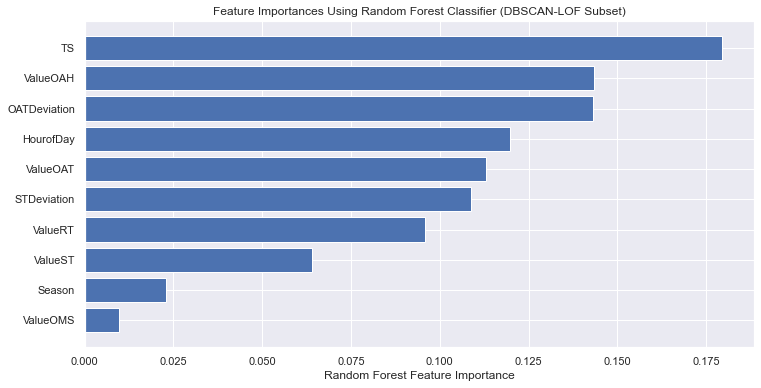

In [79]:
sorted_idx = rfc1.feature_importances_.argsort()
plt.barh(df_dblof.columns[sorted_idx], rfc1.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

plt.title('Feature Importances Using Random Forest Classifier (DBSCAN-LOF Subset)')

In [59]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_true, y_pred)

In [60]:
import shap
explainer= shap.TreeExplainer(rfc)
shap_values = explainer(df_dblof)


In [61]:
shap_values.shape

(5017, 10, 2)

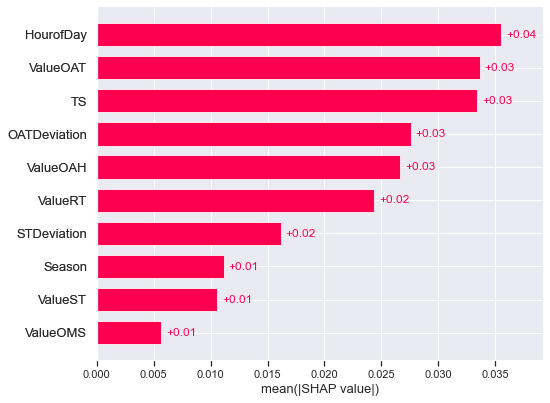

In [80]:
shap.plots.bar(shap_values[:,:,1])


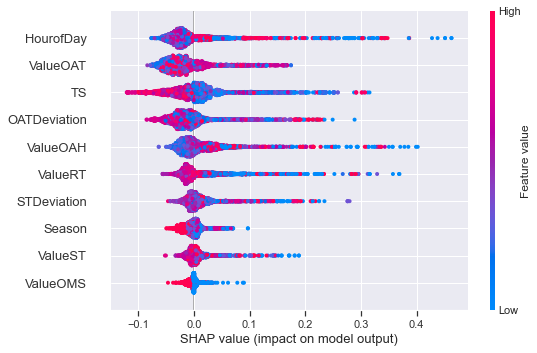

In [65]:
shap.plots.beeswarm(shap_values[:,:,1])

In [53]:
df_dblof_n.dtypes

TimeOMS          datetime64[ns]
ValueOMS                float64
ValueOOS                float64
ValueRT                 float64
ValueST                 float64
ValueOAT                float64
AnomalousST             float64
STDeviation             float64
AnomalousOAT            float64
OATDeviation            float64
ValueOAH                float64
HourofDay               float64
Month                   float64
Year                    float64
DayofWeek               float64
Season                    int64
TS                      float64
DBScanCluster             int64
LOF                     float64
dtype: object

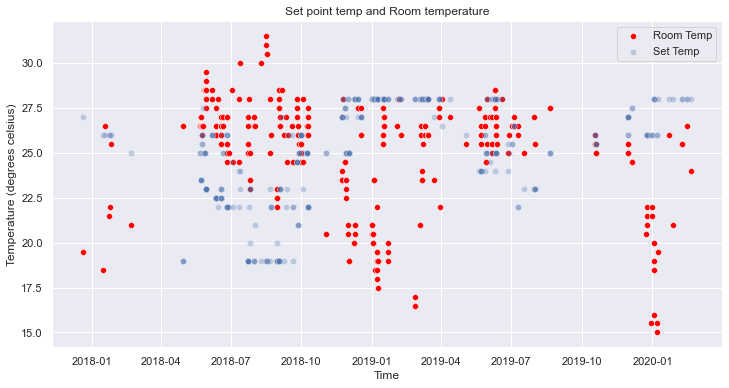

In [54]:
sns.scatterplot(data=df_dblof_n, x='TimeOMS', y='ValueRT', color='red')
sns.scatterplot(data=df_dblof_n, x='TimeOMS', y='ValueST', alpha=0.3)
plt.title('Set point temp and Room temperature')
plt.ylabel('Temperature (degrees celsius)')
plt.xlabel('Time')
plt.legend(['Room Temp','Set Temp'])

Text(0.5, 0, 'Time')

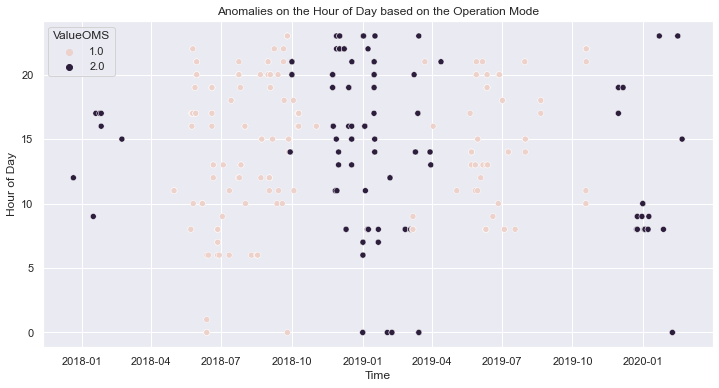

In [55]:
sns.scatterplot(data=df_dblof_n, x='TimeOMS', y='HourofDay', hue='ValueOMS')
plt.title('Anomalies on the Hour of Day based on the Operation Mode')
plt.ylabel('Hour of Day')
plt.xlabel('Time')
#plt.legend(['Room Temp','Set Temp'])

### LOF 

In [56]:
from sklearn.neighbors import LocalOutlierFactor 
# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(X_db)
X_scores = clf.negative_outlier_factor_
clfoffset=clf.offset_

<AxesSubplot:>

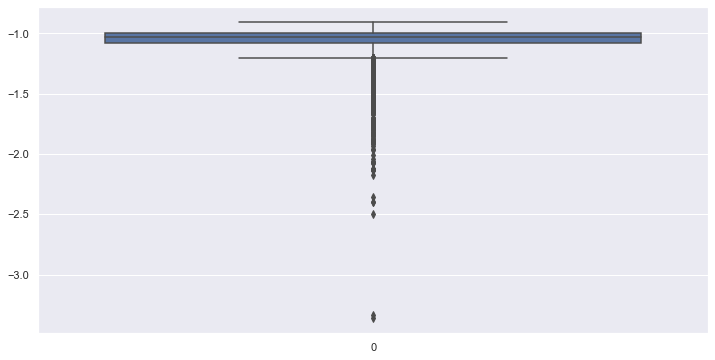

In [57]:
sns.boxplot(data=X_scores)
#plt.ylim(-1.7,0)

(-1.3, 0.0)

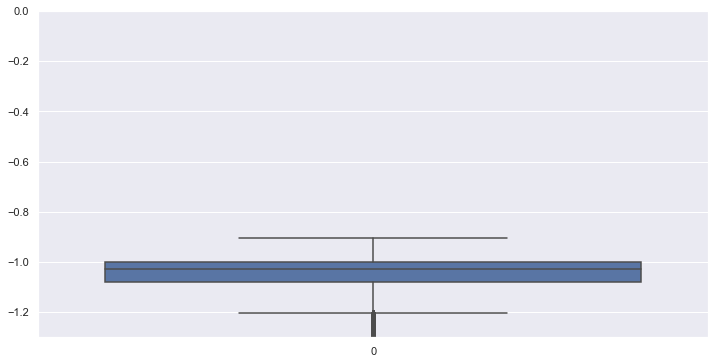

In [58]:
sns.boxplot(data=X_scores)
plt.ylim(-1.3,0)

In [59]:
w=((X_scores)<=-1.2)
unique, counts = np.unique(w, return_counts=True)

np.asarray((unique, counts)).T

array([[    0, 15697],
       [    1,  1257]], dtype=int64)

In [60]:
df['LOF']=(X_scores)
df.head()

,TimeOMS,ValueOMS,ValueOOS,ValueRT,ValueST,ValueOAT,AnomalousST,STDeviation,AnomalousOAT,OATDeviation,ValueOAH,HourofDay,Month,Year,DayofWeek,Season,TS,DBScanCluster,LOF
0,2017-12-08 16:00:52,2.0,1.0,24.5,26.0,15.1,1.0,-1.5,0.0,9.4,62.895,16.0,12.0,2017.0,4.0,4,1.512749e+09,0,-0.967571
1,2017-12-08 16:10:52,2.0,1.0,24.5,26.0,15.6,1.0,-1.5,0.0,8.9,62.895,16.0,12.0,2017.0,4.0,4,1.512749e+09,0,-0.961414
2,2017-12-11 10:40:52,2.0,1.0,20.0,25.0,14.6,1.0,-5.0,0.0,5.4,55.420,10.0,12.0,2017.0,0.0,4,1.512989e+09,-1,-1.113261
3,2017-12-11 10:50:52,2.0,1.0,20.5,25.0,14.6,1.0,-4.5,0.0,5.9,56.460,10.0,12.0,2017.0,0.0,4,1.512989e+09,-1,-1.073373
4,2017-12-11 11:00:52,2.0,1.0,21.0,25.0,14.6,1.0,-4.0,0.0,6.4,56.460,11.0,12.0,2017.0,0.0,4,1.512990e+09,-1,-1.038468


In [61]:
df_lof1=df[df['LOF']<=-1.2]
df_lof1.to_csv('lof_anomalies1.csv')
df_lofnormal=df[df['LOF']>clfoffset]
df_lofnormal.to_csv('lof_normal.csv')

In [62]:
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_db, y_pred))
print(metrics.silhouette_score(X_db, y_pred))
print('calinski harabasz score')
print(metrics.calinski_harabasz_score(X_db, y_pred))
print('davies bouldin')
print(davies_bouldin_score(X_db, y_pred))
# #############################################################################
# Plot result


Silhouette Coefficient: 0.075
0.07455433665671136
calinski harabasz score
10.813960898231802
davies bouldin
8.08248072844188


In [63]:
df['LOF_shap']=0
print(df_dbnoise['LOF_shap'])
df['LOF_shap']=df['LOF'].apply(lambda x:lof_score(x))
print(df['LOF_shap'])

2        0
3        0
4        0
5        0
6        0
        ..
16952    0
16954    0
16955    0
16956    0
16957    0
Name: LOF_shap, Length: 5017, dtype: int64
0        0
1        0
2        0
3        0
4        0
        ..
16953    0
16954    0
16955    0
16956    1
16957    0
Name: LOF_shap, Length: 16954, dtype: int64


In [64]:
(df['LOF_shap']).value_counts()

0    15697
1     1257
Name: LOF_shap, dtype: int64

In [65]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.preprocessing import label_binarize
#y=db.fit(X_db).labels_
#y=label_binarize(y, classes=[0,-1])
#X_shap= df_shap.drop('DBScanCluster', axis=1)
y=(df['LOF_shap'])
rfc=RandomForestClassifier()
rfc.fit(X_db,y)

RandomForestClassifier()

In [66]:
import shap
explainer= shap.TreeExplainer(rfc)
shap_values = explainer(X_d).values

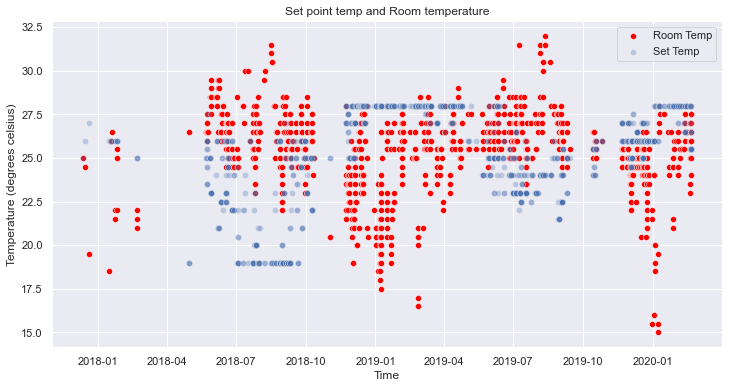

In [68]:
sns.scatterplot(data=df_lof1, x='TimeOMS', y='ValueRT', color='red')
sns.scatterplot(data=df_lof1, x='TimeOMS', y='ValueST', alpha=0.3)
plt.title('Set point temp and Room temperature')
plt.ylabel('Temperature (degrees celsius)')
plt.xlabel('Time')
plt.legend(['Room Temp','Set Temp'])

Text(0.5, 0, 'Time')

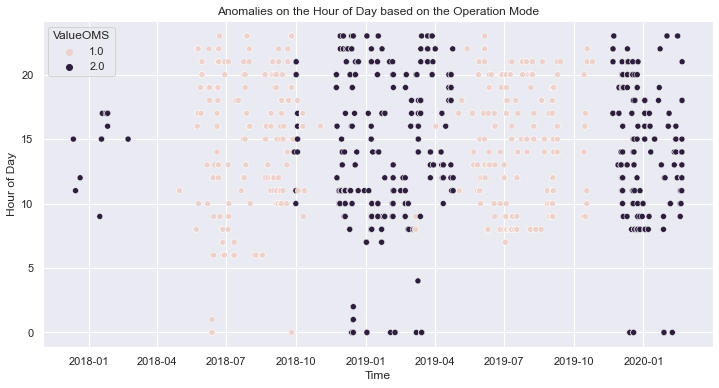

In [69]:
sns.scatterplot(data=df_lof1, x='TimeOMS', y='HourofDay', hue='ValueOMS')
plt.title('Anomalies on the Hour of Day based on the Operation Mode')
plt.ylabel('Hour of Day')
plt.xlabel('Time')
#plt.legend(['Room Temp','Set Temp'])

In [70]:
len(df_lof1)

1257

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
fig.suptitle('Distribution of Set Point Temperatre Deviation')

#DBScan
sns.histplot(ax=axes[0,0], data=df_dbnormal, x='ValueST',bins=30,kde=True)
axes[0,0].set_title('DBSCAN Clusters')

# Contextual
sns.histplot(ax=axes[0,1],data=df_normal, x='ValueST', bins=30,kde=True)
axes[0,1].set_title('Contextual Anomalous')

#K Means
sns.histplot(ax=axes[1,0],data=dfc0,x='ValueST', bins=30, kde=True)
axes[1,0].set_title('K Means')

sns.histplot(ax=axes[1,1],data=df_lof,x='ValueST', bins=30, kde=True)
axes[1,1].set_title('LOF')

In [ ]:
plt.scatter(x=df_lof['TimeOMS'],y=df_lof['ValueST'])


In [42]:
(df_dblof).columns

Index(['ValueOMS', 'ValueRT', 'ValueST', 'ValueOAT', 'STDeviation',
       'OATDeviation', 'ValueOAH', 'HourofDay', 'Season', 'TS'],
      dtype='object')

In [84]:
df_surrogate=df_surrogate[['ValueOMS', 'ValueRT', 'ValueST', 'ValueOAT',
       'STDeviation', 'OATDeviation',
       'ValueOAH', 'HourofDay', 'DayofWeek', 'Season', 'TS',
        'anom']]
df_surrogate_train=df_surrogate.drop('anom',axis=1)

In [85]:
df_surrogate_train.head()

,ValueOMS,ValueRT,ValueST,ValueOAT,STDeviation,OATDeviation,ValueOAH,HourofDay,DayofWeek,Season,TS
0,2.0,24.5,26.0,15.1,-1.5,9.4,62.895,16.0,4.0,4,1.512749e+09
1,2.0,24.5,26.0,15.6,-1.5,8.9,62.895,16.0,4.0,4,1.512749e+09
2,2.0,20.0,25.0,14.6,-5.0,5.4,55.420,10.0,0.0,4,1.512989e+09
3,2.0,20.5,25.0,14.6,-4.5,5.9,56.460,10.0,0.0,4,1.512989e+09
4,2.0,21.0,25.0,14.6,-4.0,6.4,56.460,11.0,0.0,4,1.512990e+09


In [86]:
df_surrogate['anom'].value_counts()

0    16566
1      388
Name: anom, dtype: int64

In [87]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.preprocessing import label_binarize
#y=db.fit(X_db).labels_
#y=label_binarize(y, classes=[0,-1])
#X_shap= df_shap.drop('DBScanCluster', axis=1)
y_shap=df_surrogate['anom']
rfc=RandomForestClassifier()
rfc.fit(df_surrogate_train,y_shap)

RandomForestClassifier()

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(y_shap, y_shap, normalize=False)

16954

In [88]:
import shap
explainer= shap.TreeExplainer(rfc)
shap_values = explainer(df_surrogate_train)

In [89]:
shap_values[1,4,1]

.values =
-0.0032604062055601023

.base_values =
0.022806417364633708

.data =
-1.5

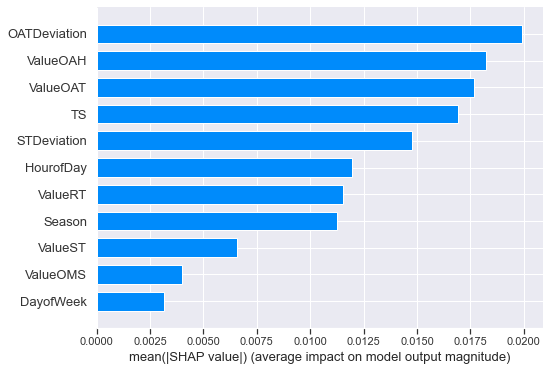

In [88]:
shap.summary_plot(shap_values[:,:,1],features=df_surrogate_train.columns,plot_type='bar')

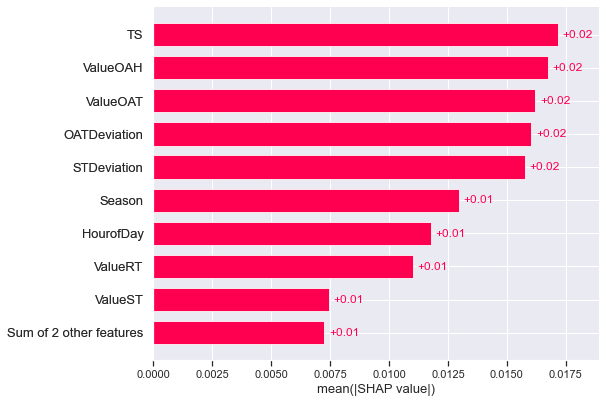

In [90]:
shap.plots.bar(shap_values[:,:,0])


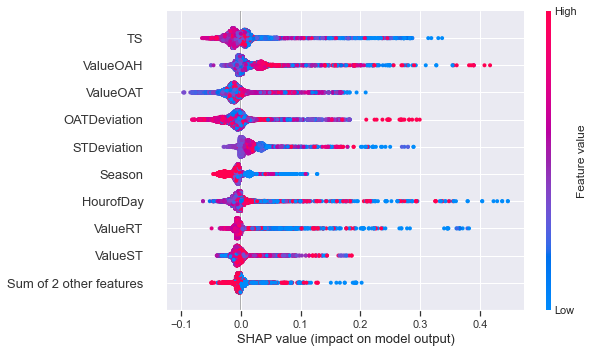

In [91]:
shap.plots.beeswarm(shap_values[:,:,1])